In [234]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

import functions.data_class as data_class
import functions.calc_stat_tests as stat_test
import importlib
importlib.reload(data_class)
importlib.reload(stat_test)

%matplotlib inline
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = 5, 5

In [219]:
sim_files_100 = ['../h5_projected/g1040_0016_binary_search_100_fib_main.h5',
                 '../h5_projected/g1041_9015_by_mass_100_fib_main.h5']

obs_file = '../observations/obs.txt'

In [220]:
# read simulation data
para_cloud = data_class.data(sim_files_100[0])
perp_cloud = data_class.data(sim_files_100[1])

# read observation data
obs = data_class.data(obs_file)

# mcfs,    ref 3,    ref 4
[o1, p1], [o2, p2], [o3, p3] = obs.obs_set

../functions/data_class.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self['b_offset'][self['b_offset'] > 90] = 180 - self['b_offset'][self['b_offset'] > 90]


In [221]:
o2.table

,cloud_name,dgf,b_orientation,cloud_orientation,b_offset
0,Lupus-1,0.63,-82.0,-1,81.0
3,IC5146,0.38,64.0,-38,78.0
4,Taurus,0.14,0.0,75,75.0
6,Perseus,1.46,59.0,32,27.0
9,Ophiuchus,2.32,-65.0,-45,20.0
10,Lupus-II-VI,1.85,81.0,-73,26.0
11,Aquila,1.48,-45.0,-75,30.0
12,CrA,3.66,-27.0,-26,1.0
13,Cepheus,1.13,69.0,65,4.0
14,Chamaelon,1.03,-71.0,19,90.0


In [222]:
relative_mcf_diff_planck = (np.mean(p1['mcf_slope'][p1['b_offset']>45]) - np.mean(p1['mcf_slope'][p1['b_offset']<45]))/p1['mcf_slope'].mean()
relative_mcf_diff_optical = (np.mean(o1['mcf_slope'][o1['b_offset']>45]) - np.mean(o1['mcf_slope'][o1['b_offset']<45]))/o1['mcf_slope'].mean()

relative_dgs_diff_planck_ref3 = (np.mean(p2['dgf'][p2['b_offset']>45]) - np.mean(p2['dgf'][p2['b_offset']<45]))/p2['dgf'].mean()

In [223]:
projection_test_13 = stat_test.projection_test(13, para_cloud, perp_cloud)

projection_mle_13 = [projection_test_13[2][i][projection_test_13[0][i] == np.max(projection_test_13[0][i])] for i in range(14)]

In [224]:
mcf_test_13 = stat_test.mcf_slope_test(13, 5, para_cloud, perp_cloud, 100)


../functions/calc_stat_tests.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)


In [225]:
dgf_para = np.ones(100)*40.1107403501/100
dgf_perp = np.ones(100)*8.6433711924/100

dgf_test_13 = stat_test.dense_gass_fraction_test(13, 5, para_cloud, perp_cloud, 100, dgf_para/para_cloud['cloud_mass'], dgf_perp/perp_cloud['cloud_mass'])

../functions/calc_stat_tests.py:161: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(result)


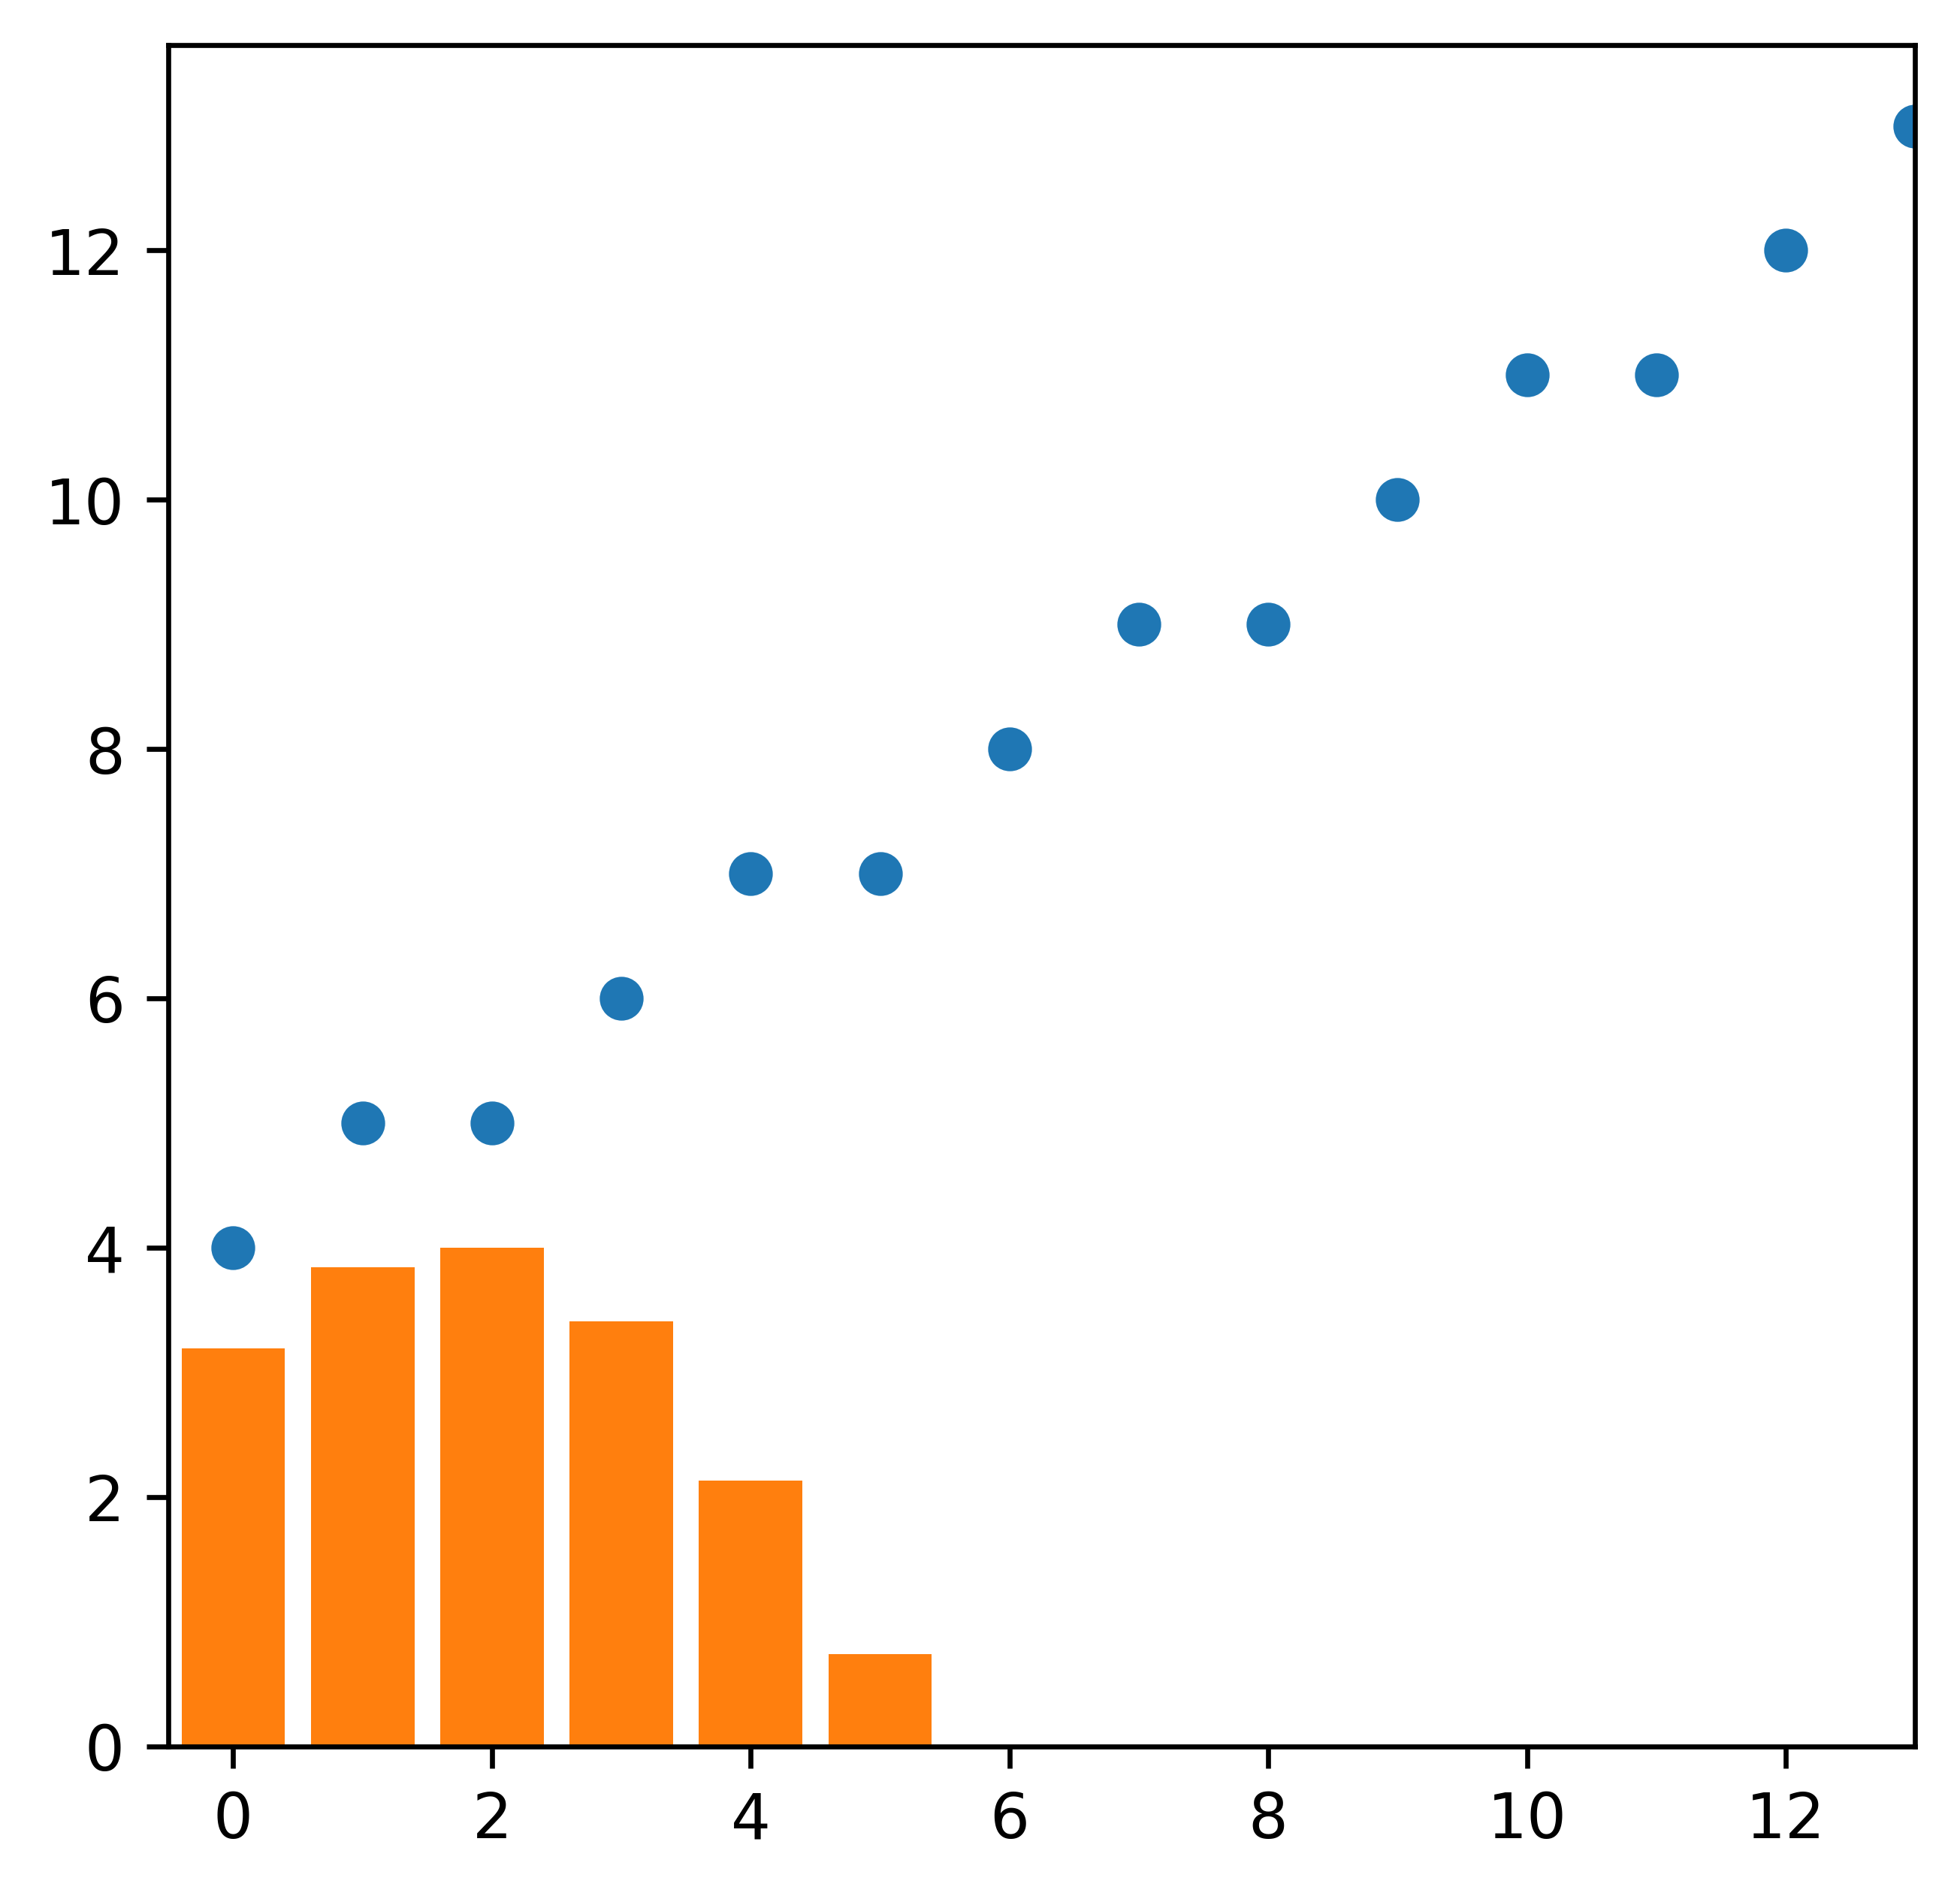

In [235]:
plt.scatter(np.arange(14), projection_mle_13)
plt.bar(np.arange(14), projection_test_13[0][:,5]/np.max(projection_test_13[0][:,5])*4)
plt.xlim(-0.5, 13)
plt.show()

P(mcf) * P(r=5) * P(dgf) =/= P(mcf and r=3 and dgf)

/home/hinny/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/hinny/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


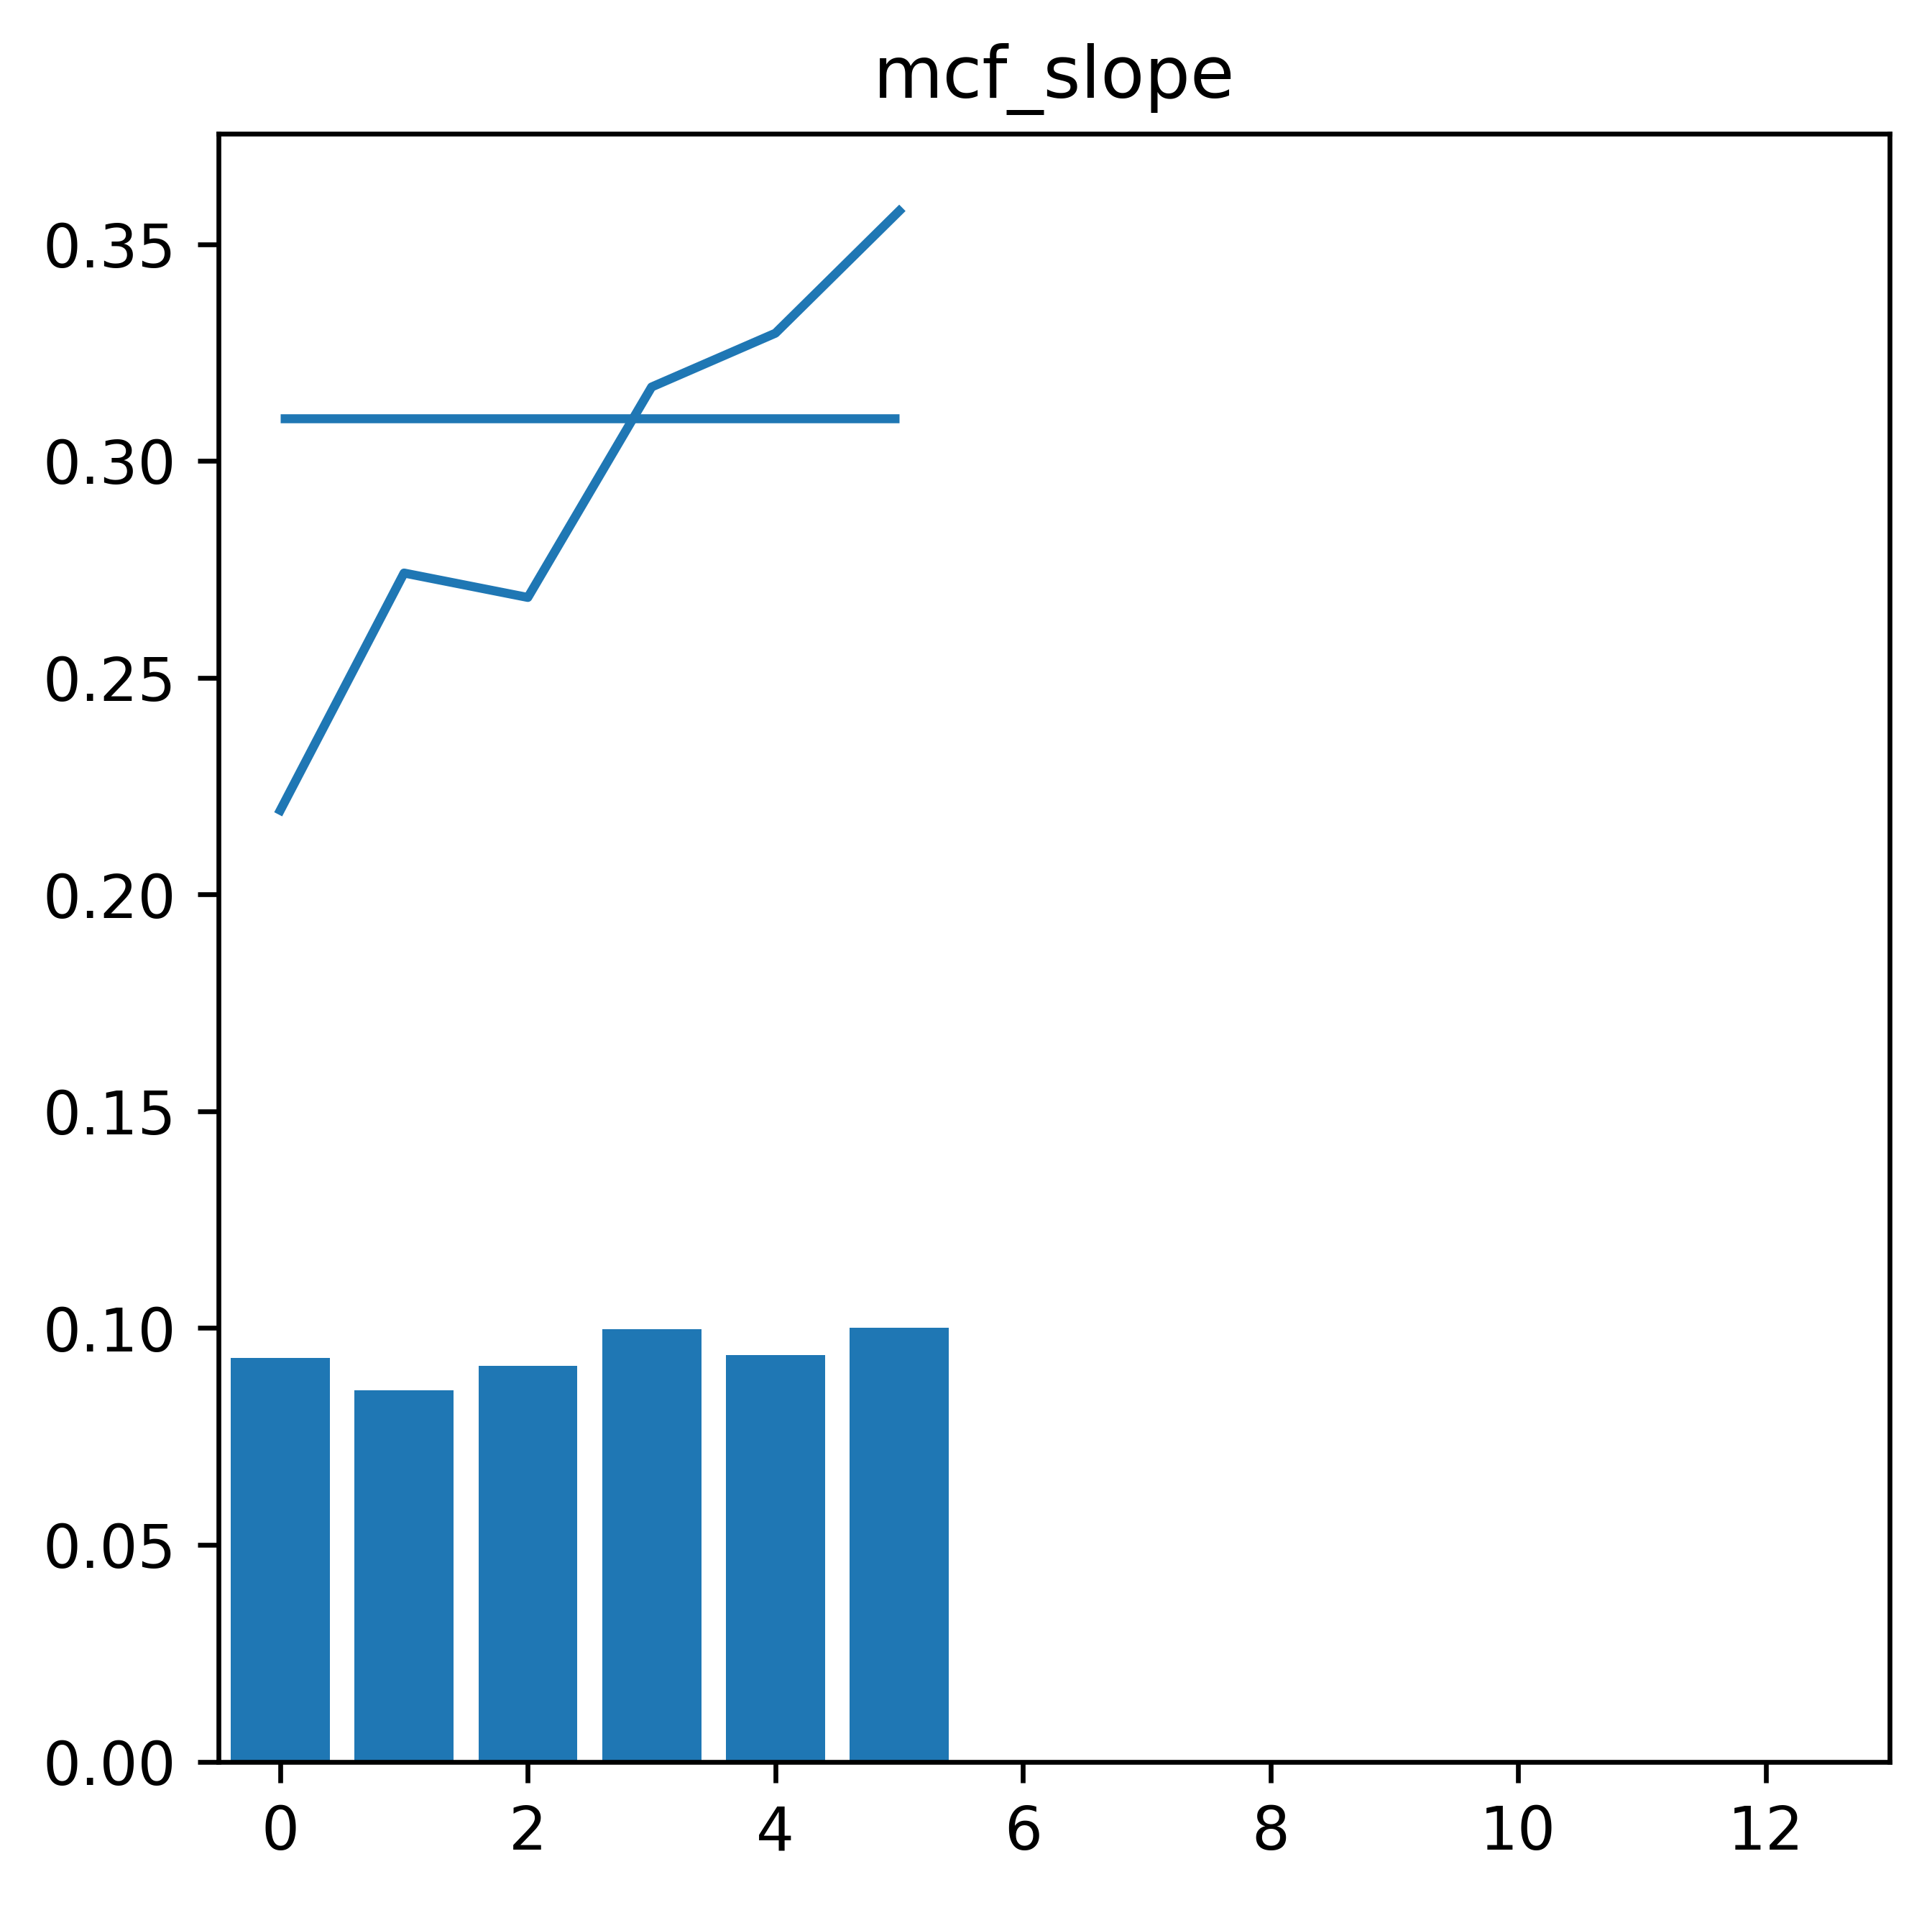

In [236]:
res = [np.mean(mcf_test_13[i]) for i in range(14)]

kde = [st.gaussian_kde(mcf_test_13[i]) for i in range(6)]

likelihood = np.array([k.pdf(relative_mcf_diff_planck)[0] for k in kde])

plt.hlines(relative_mcf_diff_planck, 0, 5)
plt.plot(np.arange(14), res)

plt.bar(np.arange(6), likelihood/np.max(likelihood)*0.1)
# plt.ylim(0, )
plt.xlim(-0.5, 13)
plt.title('mcf_slope')
plt.show()

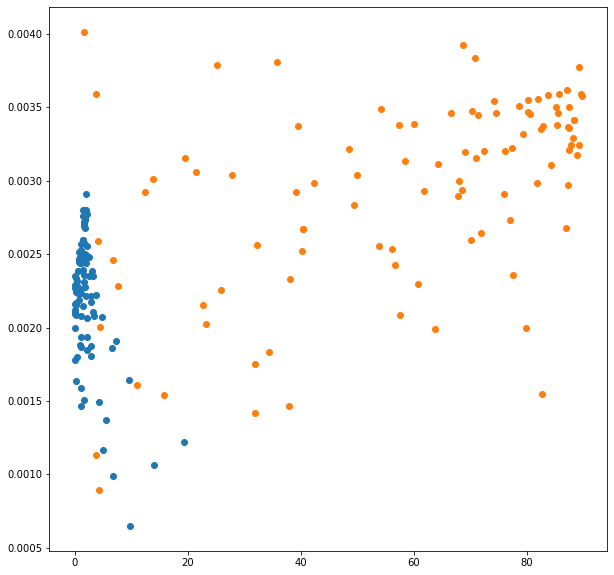

In [210]:
plt.scatter(para_cloud['b_offset'], para_cloud['mcf_slope'])
plt.scatter(perp_cloud['b_offset'], perp_cloud['mcf_slope'])
plt.show()

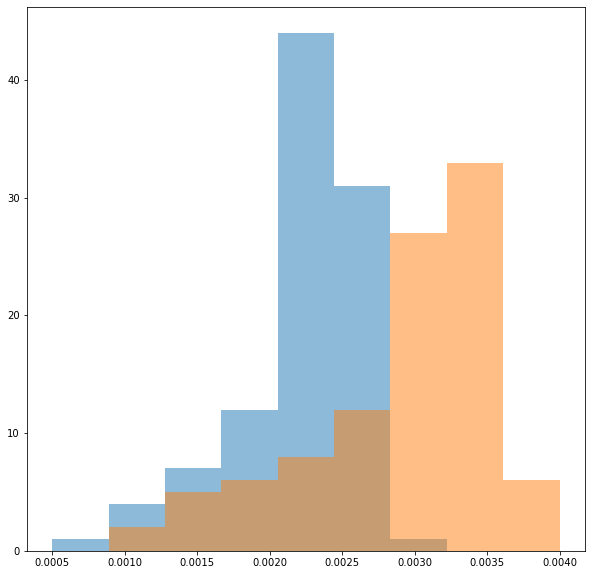

In [216]:
plt.hist(para_cloud['mcf_slope'], np.linspace(0.0005, 0.004, 10), alpha= 0.5)
plt.hist(perp_cloud['mcf_slope'], np.linspace(0.0005, 0.004, 10), alpha = 0.5)
plt.show()

/home/hinny/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/hinny/.conda/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


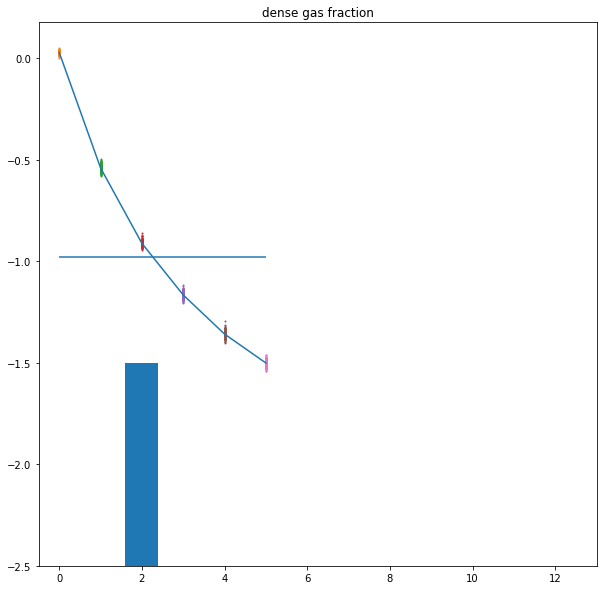

In [201]:
res = [np.mean(dgf_test_13[i]) for i in range(14)]

kde = [st.gaussian_kde(dgf_test_13[i]) for i in range(6)]

likelihood = np.array([k.pdf(relative_dgs_diff_planck_ref3)[0] for k in kde])

plt.hlines(relative_dgs_diff_planck_ref3, 0, 5)
plt.bar(np.arange(6), likelihood/np.max(likelihood), bottom = -2.5)

for i in range(6):
    plt.scatter([i]*100, dgf_test_13[i], s =  1)

plt.plot(np.arange(14), res)
plt.xlim(-0.5, 13)
plt.title('dense gas fraction')
plt.show()

In [203]:
relative_dgs_diff_planck_ref3

-0.9776145972407654

In [207]:
p2.table

,cloud_name,dgf,b_orientation,cloud_orientation,b_offset
0,Lupus-1,0.63,86.0,-1,87.0
1,Cha-I-III,1.03,-76.0,22,82.0
3,IC5146,0.38,67.0,-38,75.0
4,Taurus,0.14,1.0,75,74.0
5,Musca,0.90,-82.0,27,71.0
6,Perseus,1.46,-84.0,32,64.0
9,Ophiuchus,2.32,-81.0,-45,36.0
10,Lupus-II-VI,1.85,82.0,-73,25.0
11,Aquila,1.48,-67.0,-75,8.0
12,CrA,3.66,-26.0,-26,0.0
